In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('/Users/baptistecarbillet/Documents/MachineLearning1/smoking_driking_dataset_Ver01.csv')
df.drop('DRK_YN', axis=1, inplace=True)
#Male get one hot encoding
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'Male' else 0)

#Normalise df
#normalization
df.iloc[:,:-1]=  (df.iloc[:,:-1] - df.iloc[:,:-1].mean()) / (df.iloc[:,:-1].std())

random_state = 75
df_1 = df[df['SMK_stat_type_cd'] == 1.0].sample(5000,random_state=random_state)
df_2 = df[df['SMK_stat_type_cd'] == 2.0].sample(5000,random_state=random_state)
df_3 = df[df['SMK_stat_type_cd'] == 3.0].sample(5000,random_state=random_state)

X_1,y_1 = np.array(df_1.drop('SMK_stat_type_cd',axis=1)),np.array(df_1['SMK_stat_type_cd'])
X_2,y_2 = np.array(df_2.drop('SMK_stat_type_cd',axis=1)),np.array(df_2['SMK_stat_type_cd'])
X_3,y_3 = np.array(df_3.drop('SMK_stat_type_cd',axis=1)),np.array(df_3['SMK_stat_type_cd'])

from sklearn.model_selection import train_test_split

random_state = 75 #Paris

X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X_1,y_1,test_size=0.2,random_state=random_state)
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(X_2,y_2,test_size=0.2,random_state=random_state)
X_train_3,X_test_3,y_train_3,y_test_3 = train_test_split(X_3,y_3,test_size=0.2,random_state=random_state)

X_train = np.concatenate((X_train_1,X_train_2,X_train_3))
y_train = np.concatenate((y_train_1,y_train_2,y_train_3))

X_test = np.concatenate((X_test_1,X_test_2,X_test_3))
y_test = np.concatenate((y_test_1,y_test_2,y_test_3))

#We shuffle the data
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train,random_state=random_state)
X_test,y_test = shuffle(X_test,y_test,random_state=random_state)

In [5]:
from sklearn.svm import SVC

model = SVC(kernel='poly',gamma='auto',random_state=random_state)



from sklearn.model_selection import KFold, cross_validate
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True,random_state=random_state)


scoring=('accuracy')

scores = cross_validate(model, X_train, y_train, cv=kf, scoring=scoring, return_train_score=True)

print("Train accuracy: %0.2f (+/- %0.2f)" % (scores['train_score'].mean(), scores['train_score'].std() * 2))
print("Test accuracy: %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2))


KeyboardInterrupt: 

In [26]:
from sklearn.svm import SVC

model = SVC(kernel='rbf',gamma='auto',random_state=random_state)



from sklearn.model_selection import KFold, cross_validate
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True,random_state=random_state)


scoring=('accuracy')

scores = cross_validate(model, X_train, y_train, cv=kf, scoring=scoring, return_train_score=True)

print("Train accuracy: %0.2f (+/- %0.2f)" % (scores['train_score'].mean(), scores['train_score'].std() * 2))
print("Test accuracy: %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2))

Train accuracy: 0.68 (+/- 0.00)
Test accuracy: 0.64 (+/- 0.01)


In [8]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=random_state)

# Try different kernel

In [10]:
train_acc_rbf = []
val_acc_rbf = []

train_acc_poly  = []
val_acc_poly = []

model = SVC(kernel='rbf',gamma='auto',random_state=random_state,C=c)
model.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
train_acc_rbf.append(accuracy_score(y_train,model.predict(X_train)))
val_acc_rbf.append(accuracy_score(y_val,model.predict(X_val)))

for p in range(1,8):
    
    
    
    model = SVC(kernel='poly',gamma='auto',random_state=random_state,degree=p)
    model.fit(X_train,y_train)
    
    train_acc_poly.append(accuracy_score(y_train,model.predict(X_train)))
    val_acc_poly.append(accuracy_score(y_val,model.predict(X_val)))

In [12]:
train_acc_rbf,val_acc_rbf

([0.8820833333333333], [0.5583333333333333])

In [33]:
C = np.logspace(-3,3,70)

train_acc = []
val_acc = []

for c in C:
    model = SVC(kernel='rbf',gamma='auto',random_state=random_state,C=c)
    model.fit(X_train,y_train)
    train_acc.append(model.score(X_train,y_train))
    val_acc.append(model.score(X_val,y_val))

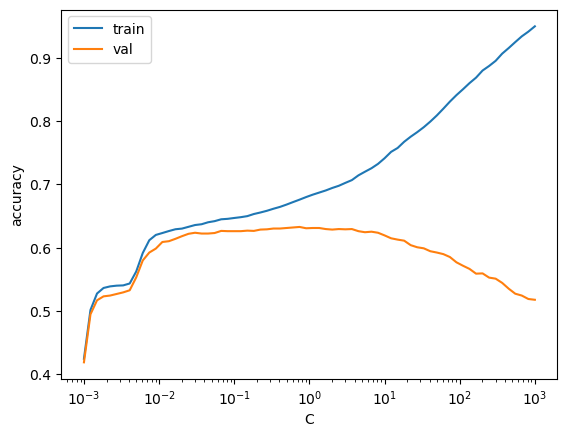

In [34]:
fig,ax = plt.subplots()
ax.plot(C,train_acc,label='train')
ax.plot(C,val_acc,label='val')
ax.set_xscale('log')
ax.set_xlabel('C')
ax.set_ylabel('accuracy')
ax.legend()
plt.show()


In [35]:
#Best C
C_best = C[np.argmax(val_acc)]
print('Best C: ',C_best)
print('Best val accuracy: ',np.max(val_acc))

Best C:  0.7405684692262434
Best val accuracy:  0.6329166666666667


In [9]:
C = np.logspace(-3,3,10)

train_acc_rbf = []
val_acc_rbf = []

train_acc_poly = []
val_acc_poly = []

for c in C:
    model = SVC(kernel='rbf',gamma='auto',random_state=random_state,C=c)
    model.fit(X_train,y_train)
    train_acc_rbf.append(model.score(X_train,y_train))
    val_acc_rbf.append(model.score(X_val,y_val))
    
    model = SVC(kernel='poly',gamma='auto',random_state=random_state,C=c)
    model.fit(X_train,y_train)
    train_acc_poly.append(model.score(X_train,y_train))
    val_acc_poly.append(model.score(X_val,y_val))
    
    

KeyboardInterrupt: 

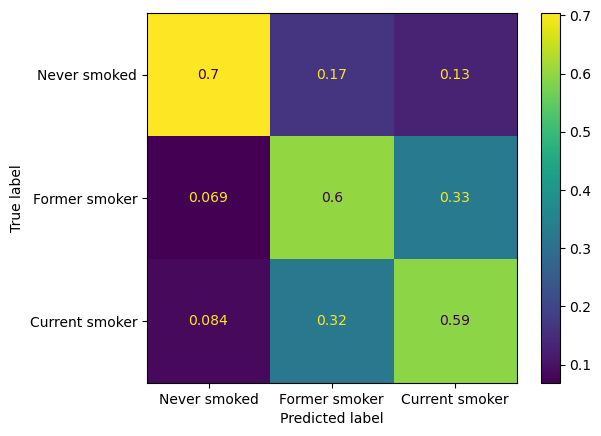

In [37]:
##Cinfusion matrix
from sklearn.metrics import confusion_matrix
model = SVC(kernel='rbf',gamma='auto',random_state=random_state,C=C_best)
model.fit(X_train,y_train)
y_pred = model.predict(X_val)
cm = confusion_matrix(y_val,y_pred,normalize='true')
#plot confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels= ['Never smoked','Former smoker','Current smoker'],)
disp.plot()

#Learning curve

In [38]:

from sklearn.metrics import accuracy_score
#Select a sample of X_train, with the corresponding y_train
train_acc_rbf = []
val_acc_rbf = []

train_acc_poly = []
val_acc_poly = []


for sample in np.linspace(0.01,0.99,98):
    X_train_sample,X_out_sample,y_train_sample,y_out_sample = train_test_split(X_train,y_train,test_size=float(1 - sample),random_state=random_state)
    
    model = SVC(kernel='rbf',gamma='auto',random_state=random_state)
    
    model.fit(X_train_sample,y_train_sample)
    
    y_pred = model.predict(X_val)
    #Train accuracy
    
    y_pred_train = model.predict(X_train_sample)
    train_acc_rbf.append(accuracy_score(y_train_sample,y_pred_train))
    
    #Validation accuracy
    val_acc_rbf.append(accuracy_score(y_val,y_pred))
    
    model = SVC(kernel='poly',gamma='auto',random_state=random_state)
    
    model.fit(X_train_sample,y_train_sample)
    
    y_pred = model.predict(X_val)
    #Train accuracy
    
    y_pred_train = model.predict(X_train_sample)
    train_acc_poly.append(accuracy_score(y_train_sample,y_pred_train))
    
    #Validation accuracy
    val_acc_poly.append(accuracy_score(y_val,y_pred))
    

    

/var/folders/_x/_fqb6r5s5rd6tk1hhyl_y7qh0000gn/T/ipykernel_42204/3614437380.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])


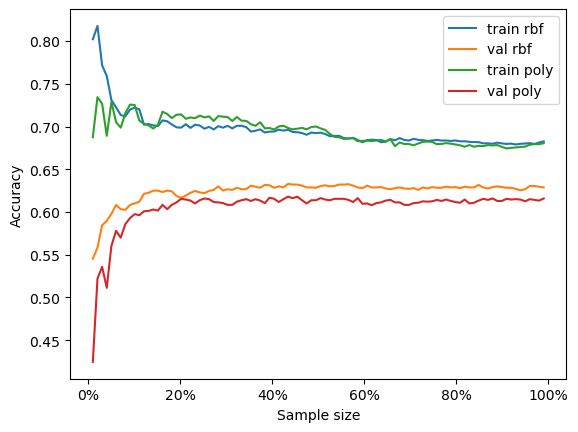

In [39]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0.01,0.99,98),train_acc_rbf,label='train rbf')
ax.plot(np.linspace(0.01,0.99,98),val_acc_rbf,label='val rbf')
ax.plot(np.linspace(0.01,0.99,98),train_acc_poly,label='train poly')
ax.plot(np.linspace(0.01,0.99,98),val_acc_poly,label='val poly')
ax.set_xlabel('Sample size')
ax.set_ylabel('Accuracy')
ax.legend()

#show x ticks as percentage
vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])


plt.show()

### Grid search

In [22]:
from sklearn.svm import SVC

rbf_clf = SVC(kernel='poly', random_state=75)

rbf_param_grid = {
    'C': np.logspace(-2, 0, 3),
    'degree' : [1,3],
    
    'gamma': np.logspace(-2, 0, 3),
}
rbf_param_grid

{'C': array([0.01, 0.1 , 1.  ]),
 'degree': [1, 3],
 'gamma': array([0.01, 0.1 , 1.  ])}

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
rbf_grid_search = GridSearchCV(
    estimator=rbf_clf,
    param_grid=rbf_param_grid,
    scoring='accuracy',
    return_train_score=True,
    cv=2,
    verbose=10,
    n_jobs=-1)

rbf_grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV 2/2; 2/18] START C=0.01, degree=1, gamma=0.1................................
[CV 2/2; 3/18] START C=0.01, degree=1, gamma=1.0................................
[CV 1/2; 4/18] START C=0.01, degree=3, gamma=0.01...............................
[CV 2/2; 5/18] START C=0.01, degree=3, gamma=0.1................................
[CV 1/2; 1/18] START C=0.01, degree=1, gamma=0.01...............................
[CV 1/2; 5/18] START C=0.01, degree=3, gamma=0.1................................
[CV 2/2; 1/18] START C=0.01, degree=1, gamma=0.01...............................
[CV 1/2; 3/18] START C=0.01, degree=1, gamma=1.0................................
[CV 1/2; 2/18] START C=0.01, degree=1, gamma=0.1................................
[CV 2/2; 4/18] START C=0.01, degree=3, gamma=0.01...............................
[CV 2/2; 3/18] END C=0.01, degree=1, gamma=1.0;, score=(train=0.641, test=0.633) total time=   0.9s
[CV 1/2; 6/18] START C=0.01, 

GridSearchCV(cv=2, estimator=SVC(kernel='poly', random_state=75), n_jobs=-1,
             param_grid={'C': array([0.01, 0.1 , 1.  ]), 'degree': [1, 3],
                         'gamma': array([0.01, 0.1 , 1.  ])},
             return_train_score=True, scoring='accuracy', verbose=10)

In [24]:
rbf_grid_search.best_params_

{'C': 1.0, 'degree': 1, 'gamma': 0.1}

In [21]:
rbf_grid_search.cv_results_['mean_test_score'], rbf_grid_search.cv_results_['params']


AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

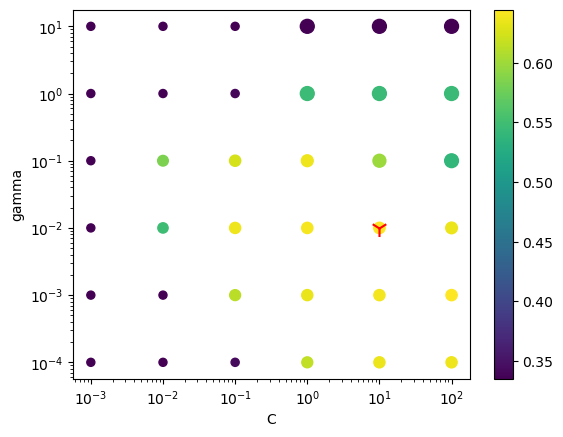

In [10]:
fig,ax = plt.subplots()
#DO a scatter plot, on x axios with have c, on y axis we have gamma and the color of the dot corresponds to the test accuracy
f = ax.scatter(rbf_grid_search.cv_results_['param_C'],rbf_grid_search.cv_results_['param_gamma'],c=rbf_grid_search.cv_results_['mean_test_score'],cmap='viridis',s=rbf_grid_search.cv_results_['mean_train_score'] * 100)
#Log axis
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('C')
ax.set_ylabel('gamma')
#add scale mapping color to values
fig.colorbar(f,ax=ax)
# Circle the best value
best_index = np.argmax(rbf_grid_search.cv_results_['mean_test_score'])
best_C = rbf_grid_search.cv_results_['param_C'][best_index]
best_gamma = rbf_grid_search.cv_results_['param_gamma'][best_index]
ax.scatter(best_C,best_gamma,c='red',s=150,marker = '1')
plt.show()

In [11]:
#Fit svm with best parameters
rbf_best = SVC(kernel='rbf',C=best_C,gamma=best_gamma,random_state=random_state,probability=True)

rbf_best.fit(X_train,y_train)

SVC(C=10.0, gamma=0.01, probability=True, random_state=75)

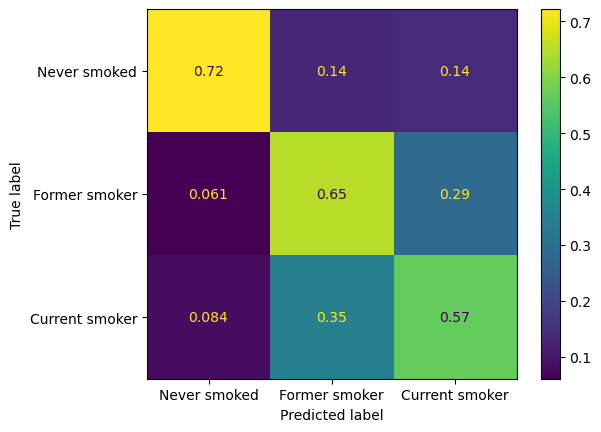

In [13]:
y_pred = rbf_best.predict(X_test)
#import confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred,normalize='true')
#plot confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels= ['Never smoked','Former smoker','Current smoker'],)
disp.plot()

In [14]:
X_test_male = X_test[X_test[:,0] > 0.5]
y_test_male = y_test[X_test[:,0] > 0.5]

X_test_female = X_test[X_test[:,0] < 0.5]
y_test_female = y_test[X_test[:,0] < 0.5]

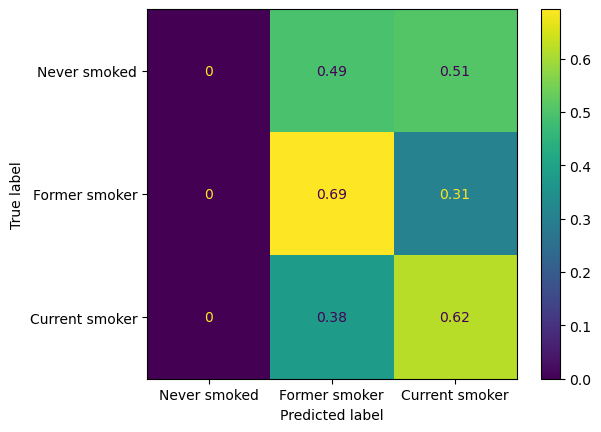

In [18]:
##Split confusion matrix by gender
#Male

y_pred_male = rbf_best.predict(X_test_male)

cm = confusion_matrix(y_test_male,y_pred_male,normalize='true')
#plot confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels= ['Never smoked','Former smoker','Current smoker'],)
disp.plot()

In [17]:
### get probability of each class
proba_male = rbf_best.predict_proba(X_test_male)

In [19]:
## Get mean probability of each class

proba_male_1 = proba_male[y_test_male == 1.0,:]
proba_male_2 = proba_male[y_test_male == 2.0,:]
proba_male_3 = proba_male[y_test_male == 3.0,:]




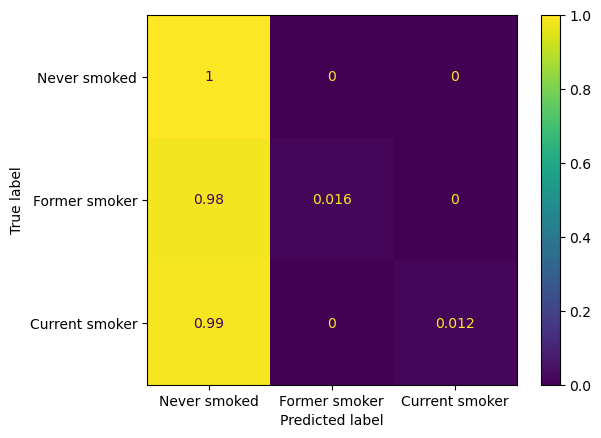

In [40]:
##Split confusion matrix by gender
#Male

y_pred_female = rbf_best.predict(X_test_female)

cm = confusion_matrix(y_test_female,y_pred_female,normalize='true')
#plot confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels= ['Never smoked','Former smoker','Current smoker'],)
disp.plot()

In [38]:
### get probability of each class
proba_female = rbf_best.predict_proba(X_test_female)

proba_female_1 = proba_female[y_test_female == 1.0,:]
proba_female_2 = proba_female[y_test_female == 2.0,:]
proba_female_3 = proba_female[y_test_female == 3.0,:]

In [37]:
np.mean(proba_male_1,axis=0)

array([0.13433613, 0.4295022 , 0.43616167])

In [26]:
# learning curve for best model
X_train_lc,X_val_lc,y_train_lc,y_val_lc = train_test_split(X_train,y_train,test_size=0.2,random_state=random_state)
#Select a sample of X_train, with the corresponding y_train
train_acc_lc = []
val_acc_lc = []
from sklearn.metrics import accuracy_score

for sample in np.linspace(0.01,0.99,98):
    X_train_sample,X_out_sample,y_train_sample,y_out_sample = train_test_split(X_train_lc,y_train_lc,test_size=float(1 - sample),random_state=random_state)
    
    model = SVC(**rbf_grid_search.best_params_,random_state=random_state,kernel='poly')
    model.fit(X_train_sample,y_train_sample)
    
    y_pred = model.predict(X_val_lc)
    #Train accuracy
    y_pred_train = model.predict(X_train_sample)
    train_acc_lc.append(accuracy_score(y_train_sample,y_pred_train))
    
    #Validation accuracy
    val_acc_lc.append(accuracy_score(y_val_lc,y_pred))

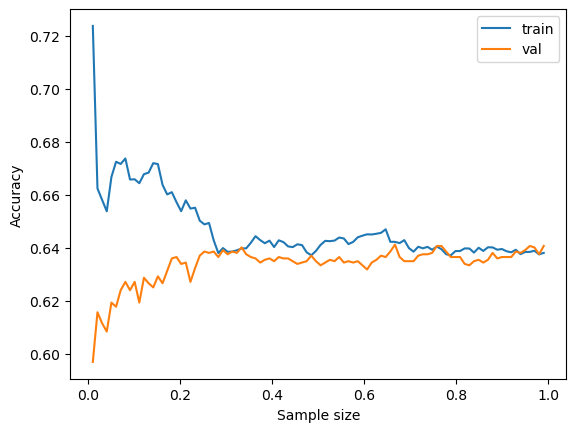

In [27]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0.01,0.99,98),train_acc_lc,label='train')
ax.plot(np.linspace(0.01,0.99,98),val_acc_lc,label='val')
ax.set_xlabel('Sample size')
ax.set_ylabel('Accuracy')
ax.legend()


In [25]:
# Score on test
model = SVC(**rbf_grid_search.best_params_,random_state=random_state)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.634